In [1]:
from train import dndt_trainer
import sklearn.datasets
import torch
import matplotlib.pyplot as plt
import numpy as np
import utils.contour_plots
from itertools import cycle, islice

from sklearn.model_selection import train_test_split

from params import parameters
from dataset import moons_dl

prms = parameters()

# dataset_noise = .15
# n_samples = 100
epochs = 1000
# n_bins = 1



None


In [2]:
sample_range = [1000,5000,10000]
noise_range = [0.15,0.35,0.55]
lr_range = [0.1,0.03,0.01]

In [3]:
for samples in sample_range:    
    for noise in noise_range:
        for n_bins in range(2,5):
            for lr in lr_range:
                prms.lr = lr
                prms.n_samples = samples
                trainset, testset, dataloader = moons_dl(prms,noise)
                model_log,dndt = dndt_trainer(dataloader,n_bins=n_bins,epochs=epochs)
                csv_name = f"DNDTsamples{samples}noise{int(100*noise)}bins{n_bins}lr{lr}.csv"
                print(csv_name)



TypeError: moons_dl() takes 1 positional argument but 2 were given

In [26]:
import pandas as pd
ml = pd.DataFrame(model_log)
ml.to_csv('ml.csv',index=False)

mr = pd.read_csv('ml.csv')
mr

,train_loss,train_acc,val_loss,val_acc
0,0.799733,0.50625,0.795967,0.475
1,0.777345,0.50625,0.771845,0.475
2,0.757614,0.50625,0.751348,0.475
3,0.740628,0.50625,0.734505,0.475
4,0.726388,0.50625,0.721185,0.475
5,0.714769,0.50625,0.711046,0.500
6,0.705486,0.51250,0.703560,0.525
7,0.698119,0.60000,0.698102,0.500
8,0.692196,0.58750,0.694067,0.475
9,0.687272,0.59375,0.690927,0.575


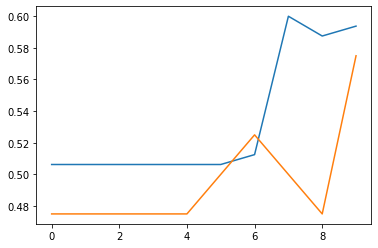

In [24]:
plt.plot(model_log['train_acc'])
plt.plot(model_log['val_acc'])


In [15]:

a = [[inputs, labels] for [inputs, labels] in dataloader['train']]

In [17]:
X = a[0][0]
y = a[0][1]

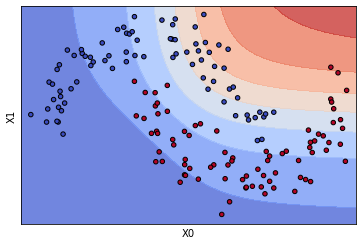

In [21]:
from utils.contour_plots import plot_results
plot_results(X,y,dndt)